<a href="https://colab.research.google.com/github/PalakAggarwal13/PyTorch-DeepLearning/blob/main/PyTorch_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)

2.6.0+cu124


In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [5]:
t2.dtype

torch.float32

In [6]:
t3 = torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [7]:
t3.dtype

torch.float32

In [8]:
t4 = torch.tensor([
    [[11.,12,13],
     [14,15,16]],
    [[17,18,19],
     [20,21,22]]
])
t4

tensor([[[11., 12., 13.],
         [14., 15., 16.]],

        [[17., 18., 19.],
         [20., 21., 22.]]])

In [9]:
t4.dtype

torch.float32

In [10]:
t1.shape

torch.Size([])

In [11]:
t2.shape

torch.Size([4])

In [12]:
t3.shape

torch.Size([3, 3])

In [13]:
t4.shape

torch.Size([2, 2, 3])

In [14]:
x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5. , requires_grad = True)

In [15]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [16]:
y.backward()

In [17]:
print("dy/dx:" , x.grad)
print("dy/dw:" , w.grad)
print("dy/db:" , b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [18]:
import numpy as np

x = np.array([[1.,2,3],[4,5,6]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y = torch.from_numpy(x)            #or you can do torch.tensor(x)
y

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [20]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [21]:
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [23]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [24]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [25]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[-1.3717,  0.0614, -0.8112],
        [ 1.0087, -2.0886, -0.2454]], requires_grad=True)
tensor([-0.8791,  0.2930], requires_grad=True)


In [26]:
def model(x):
  return x @ w.t() + b

In [27]:
preds = model(inputs)
preds

tensor([[-131.7783,  -76.5579],
        [-172.2143, -107.4149],
        [-159.0337, -206.0515],
        [-168.1640,    4.2934],
        [-146.4134, -147.7880]], grad_fn=<AddBackward0>)

In [28]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [29]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff * diff) / diff.numel()

In [30]:
loss = mse(preds , targets)
print(loss)  # full tensor

tensor(52716.7734, grad_fn=<DivBackward0>)


In [31]:
loss.backward()

In [32]:
print("dl/dw : " , w.grad)
print("dl/db : " , b.grad)

dl/dw :  tensor([[-19509.1016, -20848.2539, -12980.2285],
        [-16181.2812, -20122.1641, -11838.1660]])
dl/db :  tensor([-231.7208, -198.7038])


In [33]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# **GRADIENT DESCENT**

In [34]:
import torch

inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

lr = 1e-5

def mse(preds,targets):
  return torch.mean((preds-targets)**2)

for epoch in range(100):

  preds = inputs @ w.t() + b
  loss  = mse(preds,targets)

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

  if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f} ,  w =\n{w} , b = {b}")

Epoch 0: Loss = 18562.0195 ,  w =
tensor([[ 0.7862,  0.5386,  0.0655],
        [-0.7320,  0.3004, -0.4024]], requires_grad=True) , b = tensor([0.0633, 0.4562], requires_grad=True)
Epoch 10: Loss = 784.3158 ,  w =
tensor([[ 0.5849,  0.4245, -0.0204],
        [-0.1327,  0.9524,  0.0076]], requires_grad=True) , b = tensor([0.0612, 0.4634], requires_grad=True)
Epoch 20: Loss = 396.3494 ,  w =
tensor([[ 0.5133,  0.4434, -0.0229],
        [-0.0548,  1.0437,  0.0716]], requires_grad=True) , b = tensor([0.0606, 0.4644], requires_grad=True)
Epoch 30: Loss = 349.4511 ,  w =
tensor([[ 0.4623,  0.4785, -0.0141],
        [-0.0491,  1.0570,  0.0874]], requires_grad=True) , b = tensor([0.0603, 0.4645], requires_grad=True)
Epoch 40: Loss = 313.7310 ,  w =
tensor([[ 0.4167,  0.5138, -0.0040],
        [-0.0532,  1.0592,  0.0964]], requires_grad=True) , b = tensor([0.0600, 0.4645], requires_grad=True)
Epoch 50: Loss = 282.2720 ,  w =
tensor([[ 0.3741,  0.5472,  0.0059],
        [-0.0585,  1.0597,  0.1045

# **Linear regression using PyTorch built-ins**

In [35]:
import torch.nn as nn

In [36]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64],
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133],
                    [22, 37], [103, 119], [56, 70],
                    [81, 101], [119, 133], [22, 37],
                    [103, 119], [56, 70], [81, 101],
                    [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [37]:
from torch.utils.data import TensorDataset

In [38]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [39]:
from torch.utils.data import DataLoader

In [40]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [41]:
i=0
for xb,yb in train_dl:
  print(f"batch:{i} ")
  print(xb)
  print(yb)
  i +=1

batch:0 
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [103., 119.],
        [ 22.,  37.],
        [103., 119.]])
batch:1 
tensor([[ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 87., 134.,  58.]])
tensor([[ 56.,  70.],
        [119., 133.],
        [ 81., 101.],
        [ 22.,  37.],
        [119., 133.]])
batch:2 
tensor([[102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.]])
tensor([[ 22.,  37.],
        [103., 119.],
        [ 81., 101.],
        [119., 133.],
        [ 56.,  70.]])


In [42]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4469, -0.5146,  0.2741],
        [-0.2405,  0.4545,  0.3946]], requires_grad=True)
Parameter containing:
tensor([-0.3471, -0.4340], requires_grad=True)


In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4469, -0.5146,  0.2741],
         [-0.2405,  0.4545,  0.3946]], requires_grad=True),
 Parameter containing:
 tensor([-0.3471, -0.4340], requires_grad=True)]

In [44]:
import torch.nn.functional as F

In [45]:
loss_fn = F.mse_loss

In [46]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(12790.9492, grad_fn=<MseLossBackward0>)


In [47]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [48]:
def fit(num_epochs,model,loss_fn,opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [49]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 286.9587
Epoch [20/100], Loss: 150.6940
Epoch [30/100], Loss: 106.7062
Epoch [40/100], Loss: 59.3602
Epoch [50/100], Loss: 52.5204
Epoch [60/100], Loss: 27.4335
Epoch [70/100], Loss: 40.4631
Epoch [80/100], Loss: 14.1773
Epoch [90/100], Loss: 13.8324
Epoch [100/100], Loss: 8.7222


In [50]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.9155,  70.8204],
        [ 83.4630,  99.1374],
        [113.8390, 135.6812],
        [ 26.4792,  40.1710],
        [100.9452, 114.5400],
        [ 57.9155,  70.8204],
        [ 83.4630,  99.1374],
        [113.8390, 135.6812],
        [ 26.4792,  40.1710],
        [100.9452, 114.5400],
        [ 57.9155,  70.8204],
        [ 83.4630,  99.1374],
        [113.8390, 135.6812],
        [ 26.4792,  40.1710],
        [100.9452, 114.5400]], grad_fn=<AddmmBackward0>)

In [51]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# **Working with Images & Logistic Regression in PyTorch**

In [52]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [53]:
dataset = MNIST(root='data/',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.92MB/s]


In [54]:
len(dataset)

60000

In [55]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [56]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


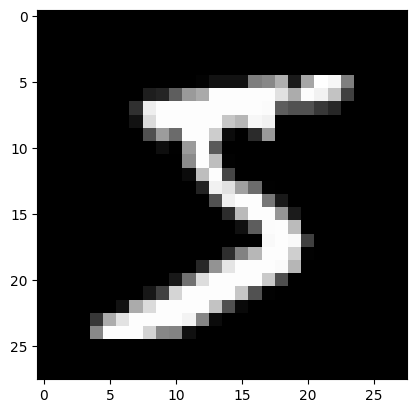

In [58]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:" ,label)

Label: 3


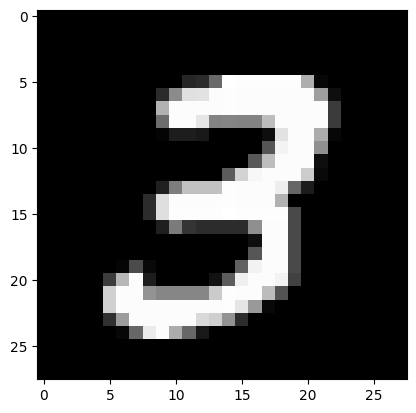

In [59]:
image , label = dataset[7]
plt.imshow(image , cmap='gray')
print("Label:" , label)

In [60]:
import torchvision.transforms as transforms

In [61]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [62]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [63]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


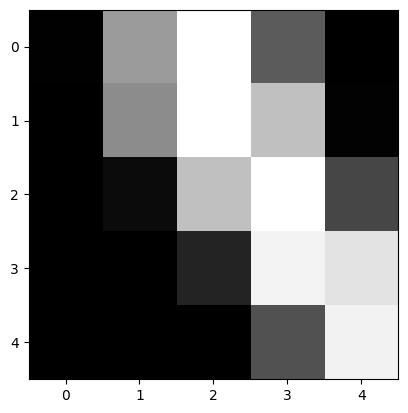

In [64]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [65]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [66]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [67]:
import numpy as np

def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [68]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [69]:
print(len(train_indices)) , print(len(val_indices))
print("sample val_indices : ", val_indices[:20])

48000
12000
sample val_indices :  [34683 23275 30514 40966  2877 24198 46942 10027  6975 56023 13347 17675
 16525  5285 57768 35176 43484 53073 33435  9217]


In [70]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [71]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_indices)